# Equivariant Graphic Statics
This project investigates graphic statics of a symmetric framework and its irreducible components.

In [1]:
import CODE.cosheaves
import CODE.samples
import CODE.tests

The module *samples* contains many sample framework geometries. Calling a function in sample returns a pair **(cell_complex, action)** where **cell_complex** encodes cell combinatorics and **action** encodes the specified group action on the vertices of the **cell_complex**.

Box wheel with spokes sample
Dihedral symmetry order 4
Plotting Framework:


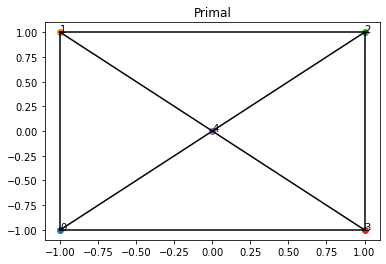

Dihedral Group of order: 8
[1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  1.  1.  1. -1. -1. -1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1. -1.  1. -1.  1.]
[ 2.  0. -2. -0.  0.  0.  0.  0.]


In [2]:
cell_complex, action = CODE.samples.boxed()
print("Plotting Framework:")
cell_complex.plot()
action.print_char_table()

The module *cosheaves* contains the force $\mathcal{F}$, constant $\overline{\mathbb{R}^2}$, and position $\mathcal{P}$ cosheaf classes. We check  that these are well-defined and the cosheaf maps that pass between are valid by running **tests.run_tests(F,J,P)**. These ensure that all the commutitive squares between the boundary maps, cosheaf maps, and cosheaf representations (for each group generators) are satisfied.

In [3]:
J = CODE.cosheaves.constant_cosheaf(cell_complex, action)
F = CODE.cosheaves.force_cosheaf(cell_complex, action)
P = CODE.cosheaves.position_cosheaf(cell_complex, action)

CODE.tests.run_tests(F,J,P)

Checking commutativity of cosheaf representation and boundary matrices

Group generator index: 1
Force Cosheaf,    dim 1 error: 0.0
Force Cosheaf,    dim 2 error: 0
Constant Cosheaf, dim 1 error: 0.0
Constant Cosheaf, dim 2 error: 0.0
Position Cosheaf, dim 1 error: 0
Position Cosheaf, dim 2 error: 0.0
Group generator index: 4
Force Cosheaf,    dim 1 error: 0.0
Force Cosheaf,    dim 2 error: 0
Constant Cosheaf, dim 1 error: 0.0
Constant Cosheaf, dim 2 error: 0.0
Position Cosheaf, dim 1 error: 0
Position Cosheaf, dim 2 error: 0.0

---------------------------------------

Check commutativity of cosheaf representation and cosheaf map matrices

Group generator index: 1
Force Cosheaf,    dim 0 error: 0.0
Force Cosheaf,    dim 1 error: 0.0
Force Cosheaf,    dim 2 error: 0
Constant Cosheaf, dim 0 error: 0
Constant Cosheaf, dim 1 error: 0.0
Constant Cosheaf, dim 2 error: 0.0
Group generator index: 4
Force Cosheaf,    dim 0 error: 0.0
Force Cosheaf,    dim 1 error: 0.0
Force Cosheaf,    dim 2 er

Everything looking good! The first homology $H_1 \mathcal{F}$ encodes the self-stresses of the framework and is computed using the method **F.homology(dim)**. There is one degree of self-stress in this example. By classical graphic statics, there are three degrees of reciprocal diagrams for this example, the dimension of $H_2 \mathcal{P}$. We can plot the reciprocal diagram and the corresponding self-stress with the method **P.plot_both**. 

Homology space dimensions:
   Force  Constant  Position
H_2: 0 ------ 2 ------ 3
H_1: 1 ------ 0 ------ 1


H_0: 3 ------ 2 ------ 0


Basis for self-stresses
[[ 0.28867513]
 [ 0.28867513]
 [ 0.28867513]
 [ 0.28867513]
 [-0.40824829]
 [-0.40824829]
 [-0.40824829]
 [-0.40824829]]

Self stress from the force cosheaf
Blue edges in tension, red edges in compression.


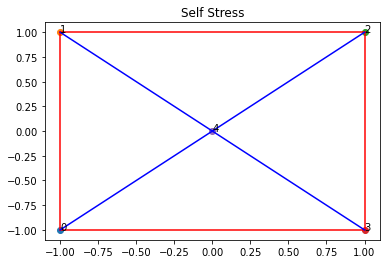

Reciprocal diagram from the position cosheaf and matched self-stress


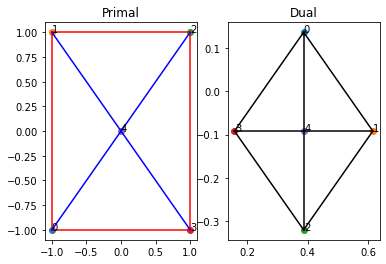

In [4]:

print("Homology space dimensions:")
print("   Force  Constant  Position")
print("H_2:", F.homology_dim(2), "------", J.homology_dim(2), "------", P.homology_dim(2))
print("H_1:", F.homology_dim(1), "------", J.homology_dim(1), "------", P.homology_dim(1))
print("H_0:", F.homology_dim(0), "------", J.homology_dim(0), "------", P.homology_dim(0))

print("\n")
print("Basis for self-stresses")
print(F.homology(1))

#There is one degree of self-stress, so we choose to plot this first dimension only
print("\nSelf stress from the force cosheaf")
F.plot_self_stress([1])
#If there were two degrees of self-stress, we could imput:  F.plot_self_stress([0.5, 0.5]) for the average of both generators.

print("Reciprocal diagram from the position cosheaf and matched self-stress")
P.plot_both([1, 0, 0])
#The vector [1,0,0] corresponds to choosing the first basis generator of H_2 P

We can distinguish the self-stress - reciprocal diagram pairs by irreducible representation of the underlying group. We observe that the only non-trivial self-stress - reciprocal diagram pair above corresponds to the first (trivial) irreducible representation of $D_8$.

Irreducible number: 0 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 0 -- 1
H_1: 1 -- 0 -- 0
H_0: 0 -- 0 -- 0


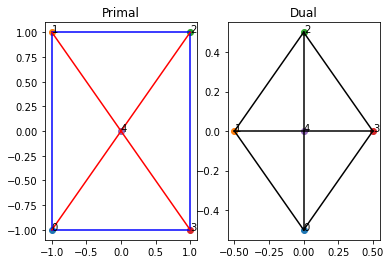

-------------------------------------------------------------------------------------------
Irreducible number: 1 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 0 -- 0
H_1: 0 -- 0 -- 1
H_0: 1 -- 0 -- 0
-------------------------------------------------------------------------------------------
Irreducible number: 2 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 0 -- 0
H_1: 0 -- 0 -- 0
H_0: 0 -- 0 -- 0
-------------------------------------------------------------------------------------------
Irreducible number: 3 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 0 -- 0
H_1: 0 -- 0 -- 0
H_0: 0 -- 0 -- 0
-------------------------------------------------------------------------------------------
Irreducible number: 4 Dimension: 2.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 1 -- 1
H_1: 0 -- 0 -- 0
H_0: 1 -- 1 -- 0
Degenerate picture, 

In [5]:
#Function that outputs the reciprocal pairs, grouped by irreducible
def irreducible_pairs(force_cosheaf, constant_cosheaf, position_cosheaf):
    Fhomology_char = [force_cosheaf.homology_irred_char(i) for i in range(0, 3)]
    Jhomology_char = [constant_cosheaf.homology_irred_char(i) for i in range(0, 3)]
    Phomology_char = [position_cosheaf.homology_irred_char(i) for i in range(0, 3)]
    P_irred_basis = position_cosheaf.homology_irred_basis(2)
    char_dims = force_cosheaf.group_action.regular_char()

    for i in range(0, force_cosheaf.group_action.num_conjugacy_classes()):
        print("Irreducible number:", i, "Dimension:", char_dims[i])
        print("Dimensions of the irreducible cosheaf homology:")
        print("     F --R^2-- P")
        print("H_2:", int(Fhomology_char[2][i]), "--", int(Jhomology_char[2][i]), "--", int(Phomology_char[2][i]) )
        print("H_1:", int(Fhomology_char[1][i]), "--", int(Jhomology_char[1][i]), "--", int(Phomology_char[1][i]) )
        print("H_0:", int(Fhomology_char[0][i]), "--", int(Jhomology_char[0][i]), "--", int(Phomology_char[0][i]) )
        if bool(P_irred_basis):    #If there exists a reciprocal figure
            #Center the figure
            non_constant_pos = position_cosheaf.remove_constant_component(P_irred_basis[i])
            for j in range(0, non_constant_pos.shape[1]):
                posvec = non_constant_pos[:,j]
                position_cosheaf.plot_both(posvec)
        print("-------------------------------------------------------------------------------------------")



#Evaluate the function on our cosheaves
irreducible_pairs(F,J,P)

We observe that the two degrees of translation correspond to the last irreducible representation of $D_8$. This irreducible has dimension 2. This framework isn't that interesting, so we consider the **klein_four** sample with $D_4$ symmetry.

Klein four sample 
Dihedral symmetry order 4

-----------------------------------------------
Irreducible number: 0 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 0 -- 3
H_1: 3 -- 0 -- 0
H_0: 0 -- 0 -- 0


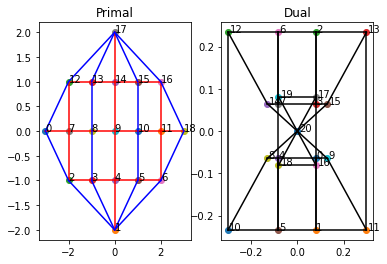

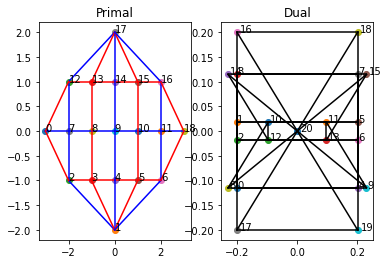

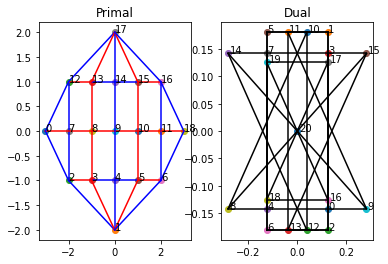

-------------------------------------------------------------------------------------------
Irreducible number: 1 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 0 -- 0
H_1: 0 -- 0 -- 2
H_0: 2 -- 0 -- 0
-------------------------------------------------------------------------------------------
Irreducible number: 2 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 1 -- 2
H_1: 1 -- 0 -- 0
H_0: 1 -- 1 -- 0


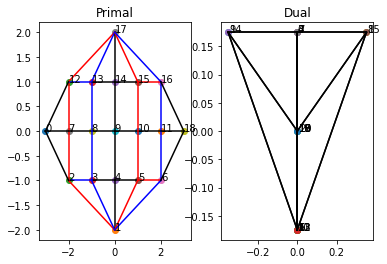

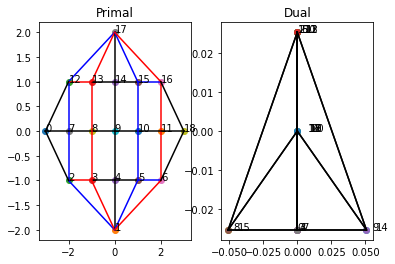

-------------------------------------------------------------------------------------------
Irreducible number: 3 Dimension: 1.0
Dimensions of the irreducible cosheaf homology:
     F --R^2-- P
H_2: 0 -- 1 -- 1
H_1: 0 -- 0 -- 0
H_0: 1 -- 1 -- 0
Degenerate picture, stress is trivial
-------------------------------------------------------------------------------------------


In [6]:
cell_complex2, action2 = CODE.samples.klein_four()
J2 = CODE.cosheaves.constant_cosheaf(cell_complex2, action2)
F2 = CODE.cosheaves.force_cosheaf(cell_complex2, action2)
P2 = CODE.cosheaves.position_cosheaf(cell_complex2, action2)

print("\n-----------------------------------------------")
irreducible_pairs(F2, J2, P2)
